<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Uvod v numerične metode in sistemi linearnih enačb (1)</b></font>
<br><br>
<font size="4">
[Prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Oktober 2018</font>
</center>

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uvod-v-numerične-metode" data-toc-modified-id="Uvod-v-numerične-metode-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod v numerične metode</a></span><ul class="toc-item"><li><span><a href="#Zaokrožitvena-napaka" data-toc-modified-id="Zaokrožitvena-napaka-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Zaokrožitvena napaka</a></span></li><li><span><a href="#Napaka-metode" data-toc-modified-id="Napaka-metode-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Napaka metode</a></span></li></ul></li><li><span><a href="#Uvod-v-sisteme-linearnih-enačb" data-toc-modified-id="Uvod-v-sisteme-linearnih-enačb-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uvod v sisteme linearnih enačb</a></span><ul class="toc-item"><li><span><a href="#O-rešitvi-sistema-linearnih-enačb" data-toc-modified-id="O-rešitvi-sistema-linearnih-enačb-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>O rešitvi sistema linearnih enačb</a></span></li><li><span><a href="#Norma-in-pogojenost-sistemov-enačb" data-toc-modified-id="Norma-in-pogojenost-sistemov-enačb-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Norma in pogojenost sistemov enačb</a></span><ul class="toc-item"><li><span><a href="#Primer-slabo-pogojene-matrike" data-toc-modified-id="Primer-slabo-pogojene-matrike-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Primer slabo pogojene matrike</a></span></li></ul></li><li><span><a href="#Numerično-reševanje-sistemov-linearnih-enačb" data-toc-modified-id="Numerično-reševanje-sistemov-linearnih-enačb-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Numerično reševanje sistemov linearnih enačb</a></span></li></ul></li><li><span><a href="#Gaussova-eliminacija" data-toc-modified-id="Gaussova-eliminacija-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gaussova eliminacija</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Povzetek-Gaussove-eliminacije" data-toc-modified-id="Povzetek-Gaussove-eliminacije-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Povzetek Gaussove eliminacije</a></span></li></ul></li><li><span><a href="#Numerična-zahtevnost" data-toc-modified-id="Numerična-zahtevnost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerična zahtevnost</a></span></li><li><span><a href="#Uporaba-knjižnjice-numpy" data-toc-modified-id="Uporaba-knjižnjice-numpy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Uporaba knjižnjice <code>numpy</code></a></span></li></ul></li><li><span><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></span></li><li><span><a href="#Dodatno" data-toc-modified-id="Dodatno-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dodatno</a></span><ul class="toc-item"><li><span><a href="#Primer-simbolnega-reševanja-sistema-linearnih-enačb-v-okviru-sympy" data-toc-modified-id="Primer-simbolnega-reševanja-sistema-linearnih-enačb-v-okviru-sympy-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Primer simbolnega reševanja sistema linearnih enačb v okviru <code>sympy</code></a></span></li></ul></li></ul></div>

# Uvod v numerične metode

Kadar želimo simulirati izbrani fizikalni proces, ponavadi postopamo takole:

1. postavimo matematični model*,
* izberemo numerično metodo in njene parametre,
* pripravimo program (pomagamo si z vgrajenimi funkcijami),
* izvedemo izračun, rezultate analiziramo in vrednotimo.

\* Če lahko matematični model rešimo analitično, numerično reševanje ni potrebno.

Matematični model poskušamo rešiti analitično, saj taka rešitev ni obremenjena z napakami. Iz tega razloga se v okviru matematike učimo reševanja sistema enačb, integriranja, odvajanja in podobno. Bistvo **numeričnih metod** je, da matematične modele rešujemo **numerično**, torej na podlagi **diskretnih vrednosti**. Kakor bomo spoznali pozneje, nam numerični pristop v primerjavi z analitičnim omogoča reševanje bistveno obsežnejših in kompleksnejših problemov.

## Zaokrožitvena napaka 

V nadaljevanju si bomo pogledali nekatere omejitve in izzive numeričnega pristopa. Prva omejitev je, da so v računalniku realne vrednosti vedno zapisane s končno natančnostjo. V Pythonu se števila pogosto zapišejo v dvojni natančnosti s približno 15 signifikantnimi števkami. 

Število z dvojno natančnostjo se v Pythonu imenuje **float64** in je zapisano v spomin v binarni obliki v 64 bitih (11 bitov eksponent in 53 bitov mantisa (1 bit za predznak)). Ker je mantisa definirana na podlagi 52 binarnih števk, se lahko pojavi pri njegovem zapisu *relativna napaka* največ $\epsilon\approx2.2\cdot 10^{-16}$. Ta napaka se imenuje **osnovna zaokrožitvena napaka** in se lahko pojavi pri vsakem vmesnem
izračunu!

Če je korakov veliko, lahko napaka zelo naraste in zato je pomembno, da je njen vpliv na rezultat čim manjši!

Spodaj je primer podrobnejših informacij za tip podatkov z dvojno natančnostjo (`float`); pri tem si pomagamo z vgrajenim modulom `sys` za klic parametrov in funkcij python sistema ([dokumentacija](https://docs.python.org/3/library/sys.html)):

In [1]:
import sys
sys.float_info.epsilon
#sys.float_info #preverite tudi širši izpis!

2.220446049250313e-16

Poleg števila z dvojno natančnostjo se uporabljajo drugi tipi podatkov; dober pregled različnih tipov je prikazan v okviru [numpy](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) in [python](https://docs.python.org/3/library/stdtypes.html) dokumentacije.

Tukaj si poglejmo primer tipa `int8`, kar pomeni celo število zapisano z 8 biti (8 bit = 1 byte). Z njim lahko v dvojiškem sistemu zapišemo cela števila od -128 do +127:

In [2]:
import numpy as np
število = np.int8(90) # poskušite še števila: -128 in nato 127, 128, 129. Kaj se dogaja?
f'Število {število} tipa {type(število)} zapisano v binari obliki:{število:8b}'

"Število 90 tipa <class 'numpy.int8'> zapisano v binari obliki: 1011010"

## Napaka metode

Poleg zaokrožitvene napake pa se pogosto srečamo tudi z **napako metode** ali **metodično napako**, ki jo naredimo takrat, ko natančen analitični postopek reševanja matematičnega modela zamenjamo s približnim numeričnim.

Pomembna lastnost numeričnih algoritmov je **stabilnost**. To pomeni, da majhna sprememba vhodnih podatkov povzroči majhno spremembo rezultatov. Če se ob majhni spremembi na vhodu rezultati zelo spremenijo, pravimo, da je **algoritem nestabilen**. V praksi torej uporabljamo stabilne algoritme; bomo pa pozneje spoznali, da je stabilnost lahko pogojena tudi z vhodnimi podatki!

Poznamo pa tudi nestabilnost matematičnega modela/naloge/enačbe; v tem primeru govorimo o **slabi pogojenosti**.

Med izvajanjem numeričnega izračuna se napake lahko širijo. Posledično je rezultat operacije manj natančen (ima manj zanesljivih števk), kakor pa je zanesljivost podatkov izračuna.

Poglejmo si sedaj splošen pristop k oceni napake. Točno vrednost označimo z $r$, približek z $a_1$; velja $r=a_1+e_1$, kjer je $e_1$ napaka. Če z numeričnim algoritmom  izračunamo bistveno boljši približek $a_2$, velja $r=a_2+e_2$. 

Ker velja $a_1+e_1=a_2+e_2$, lahko ob predpostavki $\left|e_1\right|>>\left|e_2\right|$ in $\left|e_2\right|\approx 0$ izpeljemo $a_2-a_1=e_1-e_2\approx e_1$.

$\left|a_1-a_2\right|$ je torej pesimistična ocena absolutne napake,

$\left|\frac{a_1-a_2}{a_2}\right|$ pa ocena relativne napake.

# Uvod v sisteme linearnih enačb

Pod zgornjim naslovom razumemo sistem $m$ linearnih enačb ($E_i, i=0, 1,\dots,m-1$) z $n$ neznankami ($x_j, j=0,1,\dots,n-1$):
$$
\begin{array}{rllllllll}
E_0: & A_{0,0}\,x_0 &+&A_{0,1}\,x_1&+& \ldots &+&A_{0,n-1}\,x_{n-1}&=&b_0\\
E_1: & A_{1,0}\,x_0 &+&A_{1,1}\,x_1&+& \ldots &+&A_{1,n-1}\,x_{n-1}&=&b_1\\
\vdots && &&& \vdots\\
E_{m-1}: & A_{m-1,0}\,x_0&+&A_{m-1,2}\,x_1&+& \ldots &+&A_{m-1,n}\,x_{n-1}&=&b_{m-1}.\\
\end{array}
$$
Koeficienti $A_{i,j}$ in $b_i$ so znana števila. 

V kolikor je desna stran enaka nič, torej $b_i=0$, imenujemo sistem **homogenem**, sicer je sistem **nehomogen**.

Sistem enačb lahko zapišemo tudi v matrični obliki:

$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$

kjer sta $\mathbf{A}$ in $\mathbf{b}$ znana matrika in vektor, vektor $\mathbf{x}$ pa ni znan. Matriko $\mathbf{A}$ imenujemo **matrika koeficientov**, vektor $\mathbf{b}$ **vektor konstant** (tudi: vektor prostih členov ali vektor stolpec desnih strani) in $\mathbf{x}$ **vektor neznank**. Če matriki $\mathbf{A}$ dodamo kot stolpec vektor $\mathbf{b}$, dobimo t. i. **razširjeno matriko** in jo označimo $[\mathbf{A}|\mathbf{b}]$.

Opomba glede zapisa:

* skalarne spremenljivke pišemo poševno, npr.: $a, A$,
* vektorske spremenljivke pišemo z majhno črko poudarjeno, npr.: $\mathbf{a}$,
* matrične  spremenljivke pišemo z veliko črko poudarjeno, npr.: $\mathbf{A}$.

## O rešitvi sistema linearnih enačb

Če nad sistemom linearnih enačb izvajamo **elementarne operacije**:

* množenje poljubne enačbe s konstanto (ki je različna od nič),
* spreminjanje vrstnega reda enačb,
* prištevanje ene enačbe (pomnožene s konstanto) drugi enačbi, 

rešitve sistema ne spremenimo in dobimo ekvivalentni sistem enačb.

S pomočjo elementarnih operacij nad vrsticami matrike $\mathbf{A}$ jo lahko preoblikujemo v t. i. **vrstično kanonično obliko**:

1. če obstajajo ničelne vrstice, so te na dnu matrike,
* prvi neničelni element se nahaja desno od prvih neničelnih elementov predhodnih vrstic,
* prvi neničelni element v *vrstici* imenujemo **pivot** in je enak 1,
* pivot je edini neničelni element v *stolpcu*.


**Rang matrike** predstavlja število neničelnih vrstic v vrstični kanonični obliki matrike; število neničelnih vrstic predstavlja število linearno neodvisnih enačb in je enako številu pivotnih elementov. **Rang matrike je torej enak številu linearno neodvisnih vrstic matrike**. Transponiranje matrike njenega ranga ne spremeni, zato je rang matrike enak tudi številu linearno neodvisnih *stolpcev* matrike. 

Primer preoblikovanja matrike $\mathbf{A}$:

In [3]:
import numpy as np #uvozimo numpy
A = np.arange(9).reshape((3,3))+1
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Očitno ima neničelni element `A[0,0]` vrednost 1 in je pivotni element. Prvo vrstico `A[0,:]` pomnožimo z $-4$ in produkt prištejemo drugi vrstici `A[1,:]-4A[0,:]`:

In [4]:
A[1,:] -= A[1,0]*A[0,:]
A

array([[ 1,  2,  3],
       [ 0, -3, -6],
       [ 7,  8,  9]])

Podobno naredimo za tretjo vrstico:

In [5]:
A[2,:] -= A[2,0]*A[0,:]
A

array([[  1,   2,   3],
       [  0,  -3,  -6],
       [  0,  -6, -12]])

Drugo vrstico sedaj delimo z `A[1,1]`, da dobimo pivot:

In [6]:
A[1,:] = A[1,:]/A[1,1]
A

array([[  1,   2,   3],
       [  0,   1,   2],
       [  0,  -6, -12]])

Odštejemo drugo vrstico od ostalih, da dobimo v drugem stolpcu ničle povsod, razen v drugi vrstici vrednost 1:

In [7]:
A[0,:] -= A[0,1]*A[1,:] # odštevanje od prve vrstice
A

array([[  1,   0,  -1],
       [  0,   1,   2],
       [  0,  -6, -12]])

In [8]:
A[2,:] -= A[2,1]*A[1,:] # odštevanje od zadnje vrstice
A

array([[ 1,  0, -1],
       [ 0,  1,  2],
       [ 0,  0,  0]])

Imamo dve neničelni vrstici; Matrika `A` ima dva pivota in predstavlja dve linearno neodvisni enačbi. Rang matrike je 2.

In [9]:
A

array([[ 1,  0, -1],
       [ 0,  1,  2],
       [ 0,  0,  0]])

Rang matrike pa lahko določimo tudi s pomočjo `numpy` funkcije `numpy.linalg.matrix_rank` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_rank.html)):

```python
matrix_rank(M, tol=None)
```

kjer je `M` matrika, katere rang iščemo, `tol` opcijski parameter, ki določa mejo, pod katero se vrednosti v algoritmu smatrajo enake nič.

In [10]:
np.linalg.matrix_rank(A)

2

Če velja $r=\textbf{rang}(\mathbf{A})=\textbf{rang}([\mathbf{A}|\mathbf{b}])$, potem rešitev **obstaja** (rečemo tudi, da je sistem **konsistenten**).

Konsistenten sistem ima:

* natanko eno rešitev, ko je število neznank $n$ enako rangu $r$ in 
* neskončno mnogo rešitev, ko je rang $r$ manjši od števila neznank $n$ (rešitev je odvisna od $n-r$ parametrov).

Najprej se bomo omejili na sistem $m=n$ linearnih enačb z $n$ neznankami ter velja $n=r$:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b}.$$

Pod zgornjimi pogoji je matrika koeficientov $\mathbf{A}$ nesingularna ($|\mathbf{A}|\neq 0$) in sistem ima rešitev:
$$\mathbf{x}=\mathbf{A^{-1}}\,\mathbf{b}.$$

Poglejmo si primer sistema, ko so **enačbe linearno odvisne** ($r<n$):

In [11]:
A = np.array([[1 , 2],
              [2, 4]])
b = np.array([1, 2])
Ab = np.column_stack((A,b))
Ab

array([[1, 2, 1],
       [2, 4, 2]])

S pomočjo `numpy` knjižnice poglejmo sedaj rang matrike koeficientov in razširjene matrike ter determinanto z uporabo `numpy.linalg.det` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.det.html)):

```python
det(a)
```

kjer je `a` matrika (ali seznam matrik), katere determinanto iščemo; funkcija `det` vrne determinanto (ali seznam determinant).

In [12]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, \
število neznank: {len(A[:,0])}, det(A)={np.linalg.det(A)}'

'rang(A)=1, rang(Ab)=1, število neznank: 2, det(A)=0.0'

Poglejmo še primer, ko **rešitve sploh ni** (nekonsistenten sistem):

In [13]:
A = np.array([[1 , 2],
              [2, 4]])
b = np.array([1, 1])
Ab = np.column_stack((A,b))
Ab

array([[1, 2, 1],
       [2, 4, 1]])

In [14]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, \
število neznank: {len(A[:,0])}, det(A)={np.linalg.det(A)}'

'rang(A)=1, rang(Ab)=2, število neznank: 2, det(A)=0.0'

## Norma in pogojenost sistemov enačb

Numerična naloga je slabo pogojena, če majhna sprememba podatkov povzroči veliko spremembo rezultata. V primeru *majhne spremembe podatkov*, ki povzročijo *majhno spremembo rezultatov*, pa je naloga **dobro pogojena**. 

Sistem enačb je ponavadi dobro pogojen, če so absolutne vrednosti diagonalnih elementov matrike koeficientov velike v primerjavi z absolutnimi vrednostmi izven diagonalnih elementov.

Za sistem linearnih enačb $\mathbf{A}\,\mathbf{x}=\mathbf{b}$ lahko računamo **število pogojenosti** (*angl.* condition number):

$$\textrm{cond}(\textbf{A})=||\textbf{A}||\,||\textbf{A}^{-1}||.$$

Z $||\textbf{A}||$ je označena **norma** matrike.

Obstaja več načinov računanja norme; navedimo dve:

* Evklidska norma (tudi Frobeniusova):
$$||\textbf{A}||_e=\sqrt{\sum_{i=1}^n\sum_{j=1}^nA_{ij}^2}$$
* Norma vsote vrstic ali tudi neskončna norma:
$$||\textbf{A}||_{\infty}=\max_{1\le i\le n}\sum_{j=1}^n |A_{ij}|$$

Pogojenost računamo z vgrajeno funkcijo `numpy.linalg.cond` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cond.html)):

```python
cond(x, p=None)
```

ki sprejme dva parametra: matriko `x` in opcijski tip norme `p` (privzeti tip je `None`; v tem primeru se uporabi Evklidska/Frobeniusova norma).

Če je število pogojenosti majhno, potem je matrika dobro pogojena in obratno - pri slabi pogojenosti se število pogojenosti zelo poveča.

Žal je izračun pogojenosti matrike numerično relativno zahteven.

### Primer slabo pogojene matrike

Pogledali si bomo slabo pogojen sistem, kjer bomo z malenkostno spremembo na matriki koeficientov povzročili veliko spremembo rešitve.

Matrika koeficientov:

In [15]:
A = np.array([[1 , 1],
              [1, 1.00001]])
np.linalg.cond(A)

400002.00000320596

Vektor konstant:

In [16]:
b = np.array([3, -3])
Ab = np.column_stack((A,b))
Ab

array([[ 1.     ,  1.     ,  3.     ],
       [ 1.     ,  1.00001, -3.     ]])

Preverimo rang in determinanto:

In [17]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, \
število neznank: {len(A[:,0])}, det(A)={np.linalg.det(A)}'

'rang(A)=2, rang(Ab)=2, število neznank: 2, det(A)=1.000000000006551e-05'

Od druge enačbe odšejemo prvo:

In [18]:
Ab[1,:] -= Ab[0,:]
Ab

array([[ 1.e+00,  1.e+00,  3.e+00],
       [ 0.e+00,  1.e-05, -6.e+00]])

Določimo `x1`:

In [19]:
x1 = Ab[1,2]/Ab[1,1]
x1

-599999.9999960692

Preostane še določitev `x0`:

In [20]:
x0 = (Ab[0,2] - Ab[0,1]*x1)/Ab[0,0]
x0

600002.9999960692

Malenkostno spremenimo matriko koeficientov in ponovimo reševanje:

In [21]:
A = np.array([[1 , 1],
              [1, 1.0001]]) # <= tukaj smo spremenili 1.00001 na 1.0001
np.linalg.cond(A)

40002.000074915224

Ponovimo izračun:

In [22]:
Ab = np.column_stack((A,b))
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, \
število neznank: {len(A[:,0])}, det(A)={np.linalg.det(A)}'
Ab[1,:] -= Ab[0,:]
x1_ = Ab[1,2]/Ab[1,1]
x0_ = (Ab[0,2] - Ab[0,1]*x1)/Ab[0,0]

Primerjamo obe rešitvi:

In [23]:
[x0, x1] # prva rešitev

[600002.9999960692, -599999.9999960692]

In [24]:
[x0_, x1_] # druga rešitev

[600002.9999960692, -60000.00000000661]

Ugotovimo, da je malenkostna sprememba enega koeficienta v matriki koeficientov povzročila veliko spremembo v rezultatu. Majhni spremembi podatkov se ne moremo izogniti, zaradi zapisa podatkov v računalniku.

## Numerično reševanje sistemov linearnih enačb


Pogledali si bomo dva, v principu različna pristopa k reševanju sistemov linearnih enačb:

A) **Direktni pristop**: nad sistemom enačb izvajamo elementarne operacije, s katerimi predelamo sistem enačb v lažje rešljivega,

B) **Iterativni pristop**: izberemo začetni približek, nato pa približek iterativno izboljšujemo.

# Gaussova eliminacija

Predpostavimo, da rešujemo sistem $n$ enačb za $n$ neznank, ki ima rang $n$. Tak sistem je enolično rešljiv. 

Gaussova eliminacija spada med direktne metode, saj s pomočjo elementarnih vrstičnih operacij sistem enačb prevedemo v zgornje poravnani trikotni sistem (pod glavno diagonalo v razširjeni matriki so vrednosti nič).

Najprej pripravimo razširjeno matriko koeficientov:
$$\begin{bmatrix}
\mathbf{A}|\mathbf{b}
\end{bmatrix}=
\left[\begin{array}{cccc|c}
A_{0,0}&A_{0,1}&\cdots & A_{0,n-1} & b_0\\
A_{1,0}&A_{0,1}&\cdots & A_{1,n-1} & b_1\\
\vdots&\vdots&\ddots & \vdots & \vdots\\
A_{n-1,0}&A_{n-1,1}&\cdots & A_{n-1,n-1} & b_{n-1}\\
\end{array}\right]
$$

Gaussovo eliminacijo si bomo pogledali na zgledu:

In [25]:
A = np.array([[ 8., -6, 3],
              [-6, 6,-6],
              [ 3, -6, 6]])
b = np.array([-14, 36, 6])
Ab = np.column_stack((A,b))

In [26]:
Ab

array([[  8.,  -6.,   3., -14.],
       [ -6.,   6.,  -6.,  36.],
       [  3.,  -6.,   6.,   6.]])

Korak 0: prvo vrstico pomnožimo z `Ab[1,0]/Ab[0,0]=-6/8` in odštejemo od druge:

In [27]:
Ab[1,:] -= Ab[1,0]/Ab[0,0] * Ab[0,:]
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  3.  ,  -6.  ,   6.  ,   6.  ]])

Nato prvo vrstico pomnožimo z `Ab[2,0]/Ab[0,0]=3/8` in odštejemo od tretje:

In [28]:
Ab[2,:] -= Ab[2,0]/Ab[0,0] * Ab[0,:]
Ab

array([[  8.   ,  -6.   ,   3.   , -14.   ],
       [  0.   ,   1.5  ,  -3.75 ,  25.5  ],
       [  0.   ,  -3.75 ,   4.875,  11.25 ]])

Korak 1: drugo vrstico pomnožimo z `Ab[2,1]/Ab[1,1]=-3.75/1.5` in odštejemo od tretje:

In [29]:
Ab[2,:] -= Ab[2,1]/Ab[1,1] * Ab[1,:]
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

S pomočjo pripravljenega modula `moduli/gauss_prikaz.py` lahko postopek tudi animiramo:
<img src="./fig/gauss_eliminacija2.gif" width=350>

Dobili smo zgornje trikotno matriko in Gaussova eliminacija je končana. Lahko izračunamo rešitev, torej določimo vektor neznank $x$ z **obratnim vstavljanjem**. 

Iz zadnje vrstice zgornje trikotne matrike izračunamo $x_2$:

In [151]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [152]:
x = np.zeros(3) #pripravimo prazen seznam
x[2] = Ab[2,-1]/Ab[2,2]
x

array([  0.        ,   0.        , -16.66666667])

S pomočjo predzadnje vrstice izračunamo $x_1$:

In [153]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [154]:
x[1] = (Ab[1,-1] - Ab[1,2]*x[2]) / Ab[1,1]
x

array([  0.        , -24.66666667, -16.66666667])

S pomočjo prve vrstice nato izračunamo $x_0$:

In [155]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [156]:
x[0] = (Ab[0,3] - Ab[0,1:3]@x[1:]) / Ab[0,0]
x

array([-14.        , -24.66666667, -16.66666667])

Preverimo rešitev:

In [157]:
A @ x - b

array([0.00000000e+00, 0.00000000e+00, 1.42108547e-14])

### Povzetek Gaussove eliminacije

V modul ``orodja.py`` shranimo funkciji:

In [158]:
def gaussova_eliminacija(A, b, prikazi_korake = False):
    Ab = np.column_stack((A, b))
    for p, pivot_vrsta in enumerate(Ab[:-1]):
        for vrsta in Ab[p+1:]:
            if pivot_vrsta[p]:
                vrsta[p:] -= pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
            else:
                raise Exception('Deljenje z 0.')
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print(Ab)
    return Ab

def gaussova_el_resitev(Ub):
    v = len(Ub)
    x = np.zeros(v)
    for p, pivot_vrsta in enumerate(Ub[::-1]):
        x[v-p-1] = (pivot_vrsta[-1] - pivot_vrsta[v-p:-1] @ x[v-p:] ) / (pivot_vrsta[v-p-1])
    return x

Algoritem, s katerim iz zgornje trikotnega sistema enačb $\mathbf{U}\,\mathbf{x}=\mathbf{b}$ izračunamo rešitev, imenujemo **obratno vstavljanje** (angl. *back substitution*); $\mathbf{U}$ je zgornje trikotna matrika.

V kolikor bi reševali sistem $\mathbf{L}\,\mathbf{x}=\mathbf{b}$ in je $\mathbf{L}$ spodnje trikotna matrika, bi to metodo imenovali **direktno vstavljanje** (angl. *forward substitution*).

In [159]:
Ub = gaussova_eliminacija(A, b, prikazi_korake=False)
Ub

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [160]:
gaussova_el_resitev(Ub)

array([-14.        , -24.66666667, -16.66666667])

## Numerična zahtevnost

Numerično zahtevnost ocenjujemo po številu matematičnih operacij, ki so potrebne za izračun. 
Za rešitev $n$ linearnih enačb tako z Gaussovo eliminacijo potrebujemo približno $n^3/3$ matematičnih operacij. Za določitev neznank $\mathbf{x}$ potrebujemo še dodatnih približno $n^2$ operacij.

Pri Gaussovi eliminaciji smo eliminacijo izvedli samo za člene pod diagonalo; če bi z eliminacijo nadaljevali in jo izvedli tudi za člene nad diagonalo, bi izvedli t. i. *Gauss-Jordanovo* eliminacijo, za katero pa potrebujemo dodatnih približno $n^3/3$ operacij* (kar se šteje kot glavna slabost te metode).

\* Nekaj komentarjev na temo števila numeričnih operacij najdete tukaj: [pinm.ladisk.si](http://pinm.ladisk.si/303/kako-dolo%C4%8Damo-numeri%C4%8Dno-zahtevnost-algoritmov).

## Uporaba knjižnjice `numpy`

Reševanje sistema linearnih enačb z `numpy.linalg.solve` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)):

```python
solve(a, b)
```

kjer je `a` matrika koeficientov (ali seznam matrik) in je `b` vektor konstant (ali seznam vektorjev). Funkcija vrne vektor (ali seznam vektorjev) rešitev.

In [161]:
np.linalg.solve(A, b)

array([-14.        , -24.66666667, -16.66666667])

# Nekaj vprašanj za razmislek!

1. Za sistem enačb: 
    $$
    \mathbf{A}=
    \begin{bmatrix}
    1 & -4 & 1\\
    1 & 6 & -1\\
    2 & -1 & 2
    \end{bmatrix}
    \qquad
    \mathbf{b}=
    \begin{bmatrix}
    7\\
    13\\
    5
    \end{bmatrix}
    $$

    najdite rešitev s pomočjo ``np.linalg.solve()``.

* Za zgoraj definirano matriko $\mathbf{A}$ določite Evklidsko normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite neskončno normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite pogojenost (``numpy`` funkcija).
* Definirajte funkcijo ``gauss_elim``, ki za poljubno matriko $\mathbf{A}$ in vektor $\mathbf{b}$ izvede Gaussovo eliminacijo (posebej za matriko in posebej za vektor tako, da ne sestavite razširjene matrike $[\mathbf{A}|\mathbf{b}]$).
* Definirajte funkcijo ``gauss_elim_x``, ki za razultat funkcije ``gauss_elim`` najde ustrezne vrednosti vektorja $\textbf{x}$.
* Zgornji funkciji dopolnite s štetjem matematičnih operacij.
* Na sliki je prikazan sistem mas:

    <img width=600 src="./fig/mase_na_klancu.png">
    
    Predpostavite, da se sistem zaradi teže giblje po klancu navzdol z neznanim pospeškom $a$ in da so vrvi napete z neznanimi silami $F_i$. Znane veličine so (sami jih določite): posamično telo ima maso $m_i$, koeficient trenja s podlago $\mu_i=1$, $g=9,81$m/s$^2$, $\varphi=55^{\circ}$.
    Določite sistem enačb v primeru dveh teles. Določite matriko koeficientov $\mathbf{A}$ in vektorja $\mathbf{b}$ ter $\mathbf{x}$.
* Za zgoraj definiran sistem mas predpostavite, da je mas 4 (ali več) ter določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{x}$ ter $\mathbf{b}$. Rešite sistem s pomočjo Gaussove elimnacije/LU razcepa ali ``np.linalg.solve``. Preverite pogojenost!
* V sistemu mas dobimo fizikalno nekonsistentno rešitev, če imamo v kateri od vrvi tlačno silo (vrv ne prenese tlačne sile). Preverite, ali je to v vašem primeru res. Ustrezno spremenite koeficient(e) trenja, da se bo to zgodilo.

# Dodatno

Poglejte si strani:
* [micropython.org](http://www.micropython.org)
* [kivy.org](http://www.kivy.org)
* [openmodal.com](http://www.openmodal.com)

## Primer simbolnega reševanja sistema linearnih enačb v okviru `sympy`

In [162]:
import sympy as sym
sym.init_printing()

In [163]:
A11, A12, A21, A22 = sym.symbols('A11, A12, A21, A22')
x1, x2 = sym.symbols('x1, x2')
b1, b2 = sym.symbols('b1, b2')
A = sym.Matrix([[A11, A12],
                [A21, A22]])
x = sym.Matrix([[x1],
                [x2]])
b = sym.Matrix([[b1],
                [b2]])

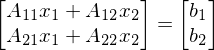

In [164]:
eq = sym.Eq(A*x,b)
eq

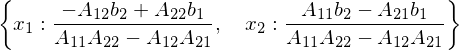

In [165]:
#%%timeit
resitev = sym.solve(eq,[x1, x2])
resitev

In [166]:
A.det()